In [306]:
import pandas as pd

In [307]:
fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]
dfs= [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]



In [308]:
dfs[0]

,MORTGAGE30US
observation_date,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2025-03-27,6.65
2025-04-03,6.64
2025-04-10,6.62


In [309]:
fed_data = pd.concat(dfs, axis=1)
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
observation_date,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2025-03-27,6.65,NaN,NaN
2025-04-03,6.64,NaN,NaN
2025-04-10,6.62,NaN,NaN


In [310]:
# The forward fill method is used to fill in missing values in the DataFrame.
fed_data = fed_data.ffill()
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
observation_date,,,
1947-01-01,NaN,NaN,21.480
1947-02-01,NaN,NaN,21.620
1947-03-01,NaN,NaN,22.000
1947-04-01,NaN,NaN,22.000
1947-05-01,NaN,NaN,21.950
...,...,...,...
2025-03-27,6.65,6.9,319.615
2025-04-03,6.64,6.9,319.615
2025-04-10,6.62,6.9,319.615


In [311]:
zillow_files = ["Modified_Metro_median_sale.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv", ]
dfs = [pd.read_csv(f) for f in zillow_files]

In [312]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2/2/2008,2/9/2008,2/16/2008,2/23/2008,3/1/2008,...,5/7/2022,5/14/2022,5/21/2022,5/28/2022,6/4/2022,6/11/2022,6/18/2022,6/25/2022,7/2/2022,7/9/2022
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900,370000,370000,375000,375000,370000,375000,370000,370000,362500
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000,555000,550000,575000,575000,578000,590000,582000,585000,595000
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000,925000,925000,951000,950000,920500,925000,900000,900500,906000
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000,310000,315500,315000,330000,324950,335000,325000,325000,315000
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000,430000,430000,425000,440000,425000,427750,426000,420000,420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500,345000,327700,345000,350000,343250,359900,352000,336000,342990
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000,285250,295000,273450,301000,290000,300900,281900,289250,280000
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000,540000,535000,552500,543750,571000,530300,569900,539950,572500
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000,450000,428500,480000,465000,440000,450250,416000,465000,435250


In [313]:
# Filter for San Francisco, CA in each Zillow dataset
dfs = [df[df['RegionName'] == 'San Francisco, CA'] for df in dfs]

# Extract the date and price columns (skip metadata columns)
dfs = [pd.DataFrame(df.iloc[0, 5:]) for df in dfs]

In [314]:
dfs[0]

,11
2/2/2008,525000.0
2/9/2008,555000.0
2/16/2008,585000.0
2/23/2008,600000.0
3/1/2008,589500.0
...,...
6/11/2022,1195000
6/18/2022,1100000
6/25/2022,1150000
7/2/2022,1100000


In [315]:
dfs[1].index = pd.to_datetime(dfs[1].index)
dfs[1]

,12
1996-02-29,207559.892448
1996-03-31,208043.354201
1996-04-30,208065.221875
1996-05-31,209222.807083
1996-06-30,210723.214199
...,...
2024-11-30,1158376.500929
2024-12-31,1153747.360456
2025-01-31,1147816.638132
2025-02-28,1153089.178763


In [316]:
fed_data.index = pd.to_datetime(fed_data.index)
fed_data_aligned = fed_data.reindex(dfs[1].index, method='ffill')



In [317]:
fed_data_aligned = fed_data_aligned.drop(columns=['month'], errors='ignore')
dfs[1] = dfs[1].drop(columns=['month'], errors='ignore')
dfs[1]



,12
1996-02-29,207559.892448
1996-03-31,208043.354201
1996-04-30,208065.221875
1996-05-31,209222.807083
1996-06-30,210723.214199
...,...
2024-11-30,1158376.500929
2024-12-31,1153747.360456
2025-01-31,1147816.638132
2025-02-28,1153089.178763


In [318]:
price_data = dfs[1].join(fed_data_aligned, how='left')
price_data = price_data.ffill().bfill()



C:\Users\Semhar\AppData\Local\Temp\ipykernel_13536\1350347289.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_data = price_data.ffill().bfill()


In [319]:
print(len(price_data))  # Should be much > 350 now
print(price_data.head())
print(price_data.tail())

350
                       12  MORTGAGE30US  RRVRUSQ156N  CPIAUCSL
1996-02-29  207559.892448          7.32          7.9     155.0
1996-03-31  208043.354201          7.69          7.9     155.5
1996-04-30  208065.221875          7.92          7.8     156.1
1996-05-31  209222.807083          8.03          7.8     156.4
1996-06-30  210723.214199          8.29          7.8     156.7
                      12  MORTGAGE30US  RRVRUSQ156N  CPIAUCSL
2024-11-30  1.158377e+06          6.81          6.9   316.449
2024-12-31  1.153747e+06          6.85          6.9   317.603
2025-01-31  1.147817e+06          6.95          6.9   319.086
2025-02-28  1.153089e+06          6.76          6.9   319.775
2025-03-31  1.163075e+06          6.65          6.9   319.615


In [320]:
# Step 1: Make sure the index is datetime
dfs[1].index = pd.to_datetime(dfs[1].index)

# Step 2: Resample to weekly frequency using forward-fill
dfs[1] = dfs[1].resample('W').ffill()

# Optional: Add 'month' column back if needed
dfs[1]['month'] = dfs[1].index.to_period('M')

# Step 3: Now re-align fed_data to this weekly index
fed_data.index = pd.to_datetime(fed_data.index)
fed_data_aligned = fed_data.reindex(dfs[1].index, method='ffill')

# Step 4: Drop any duplicate columns like 'month'
dfs[1] = dfs[1].drop(columns=['month'], errors='ignore')
fed_data_aligned = fed_data_aligned.drop(columns=['month'], errors='ignore')

# Step 5: Join the datasets
price_data = dfs[1].join(fed_data_aligned, how='left')

# Step 6: Fill any remaining NaNs
price_data = price_data.ffill().bfill()

# Step 7: Confirm row count
print(len(price_data))  # Should be around 1500+


1519


C:\Users\Semhar\AppData\Local\Temp\ipykernel_13536\3792020498.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_data = price_data.ffill().bfill()


In [321]:
# for df in dfs:
#     df.index = pd.to_datetime(df.index)
#     df["month"] = df.index.to_period("M")
# dfs[1]

In [322]:
# # Step 1: Add 'month' column to fed_data (if not done already)
# fed_data['month'] = fed_data.index.to_period('M')

# # Step 2: Group FED data to monthly resolution (last value in each month)
# fed_monthly = fed_data.groupby('month').last().reset_index()
# fed_monthly['Date'] = fed_monthly['month'].dt.to_timestamp()
# fed_monthly = fed_monthly.set_index('Date')

# # Step 3: Merge with dfs[1] on 'month'
# dfs[1]['month'] = dfs[1].index.to_period('M')
# price_data = dfs[1].merge(fed_monthly, on='month', how='left')
# price_data['Date'] = pd.to_datetime(price_data['month'].astype(str))
# price_data = price_data.set_index('Date')

# # drop 'month' column
# price_data = price_data.drop(columns=['month'])

# # Preview
# print(price_data.head())


In [323]:
price_data = price_data.rename(columns={12: 'value'})

price_data = price_data.rename(columns={
    '12': 'value',            # Zillow Value Index
    'MORTGAGE30US': 'interest',  # Mortgage Rate
    'RRVRUSQ156N': 'vacancy',    # Rental Vacancy
    'CPIAUCSL': 'cpi'            # Consumer Price Index
})
price_data

,value,interest,vacancy,cpi
1996-03-03,2.075599e+05,7.41,7.9,155.500
1996-03-10,2.075599e+05,7.38,7.9,155.500
1996-03-17,2.075599e+05,7.83,7.9,155.500
1996-03-24,2.075599e+05,7.81,7.9,155.500
1996-03-31,2.080434e+05,7.69,7.9,155.500
...,...,...,...,...
2025-03-09,1.153089e+06,6.63,6.9,319.615
2025-03-16,1.153089e+06,6.65,6.9,319.615
2025-03-23,1.153089e+06,6.67,6.9,319.615
2025-03-30,1.153089e+06,6.65,6.9,319.615


In [324]:
# Reindex fed_data to match all Zillow dates using forward fill
fed_data_aligned = fed_data.reindex(price_data.index, method='ffill')

# Merge without losing Zillow weekly resolution
price_data = price_data.join(fed_data_aligned, how='inner')

# Drop any remaining NaNs if any
price_data = price_data.dropna()

# Review the result
print(price_data.head(20))
price_data.tail(20)


                    value  interest  vacancy    cpi  MORTGAGE30US  \
1996-03-03  207559.892448      7.41      7.9  155.5          7.41   
1996-03-10  207559.892448      7.38      7.9  155.5          7.38   
1996-03-17  207559.892448      7.83      7.9  155.5          7.83   
1996-03-24  207559.892448      7.81      7.9  155.5          7.81   
1996-03-31  208043.354201      7.69      7.9  155.5          7.69   
1996-04-07  208043.354201      7.78      7.8  156.1          7.78   
1996-04-14  208043.354201      8.05      7.8  156.1          8.05   
1996-04-21  208043.354201      7.95      7.8  156.1          7.95   
1996-04-28  208043.354201      7.92      7.8  156.1          7.92   
1996-05-05  208065.221875      7.99      7.8  156.4          7.99   
1996-05-12  208065.221875      8.24      7.8  156.4          8.24   
1996-05-19  208065.221875      8.08      7.8  156.4          8.08   
1996-05-26  208065.221875      8.01      7.8  156.4          8.01   
1996-06-02  209222.807083      8.0

,value,interest,vacancy,cpi,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
2024-11-24,1.161303e+06,6.84,6.9,316.449,6.84,6.9,316.449
2024-12-01,1.158377e+06,6.81,6.9,317.603,6.81,6.9,317.603
2024-12-08,1.158377e+06,6.69,6.9,317.603,6.69,6.9,317.603
2024-12-15,1.158377e+06,6.60,6.9,317.603,6.60,6.9,317.603
2024-12-22,1.158377e+06,6.72,6.9,317.603,6.72,6.9,317.603
2024-12-29,1.158377e+06,6.85,6.9,317.603,6.85,6.9,317.603
2025-01-05,1.153747e+06,6.91,6.9,319.086,6.91,6.9,319.086
2025-01-12,1.153747e+06,6.93,6.9,319.086,6.93,6.9,319.086
2025-01-19,1.153747e+06,7.04,6.9,319.086,7.04,6.9,319.086
2025-01-26,1.153747e+06,6.96,6.9,319.086,6.96,6.9,319.086


In [325]:
# Drop the duplicate original columns
price_data = price_data.drop(columns=['MORTGAGE30US', 'RRVRUSQ156N', 'CPIAUCSL'])
# Show the last 5 or 10 records to inspect recent data
print(price_data.tail(10))

                   value  interest  vacancy      cpi
2025-02-02  1.147817e+06      6.95      6.9  319.775
2025-02-09  1.147817e+06      6.89      6.9  319.775
2025-02-16  1.147817e+06      6.87      6.9  319.775
2025-02-23  1.147817e+06      6.85      6.9  319.775
2025-03-02  1.153089e+06      6.76      6.9  319.615
2025-03-09  1.153089e+06      6.63      6.9  319.615
2025-03-16  1.153089e+06      6.65      6.9  319.615
2025-03-23  1.153089e+06      6.67      6.9  319.615
2025-03-30  1.153089e+06      6.65      6.9  319.615
2025-04-06  1.163075e+06      6.64      6.9  319.615


In [326]:

print(price_data.describe())

              value     interest      vacancy          cpi
count  1.519000e+03  1519.000000  1519.000000  1519.000000
mean   6.444675e+05     5.470454     8.171626   221.812463
std    2.953133e+05     1.524933     1.430965    43.208378
min    2.075599e+05     2.650000     5.600000   155.500000
25%    4.360069e+05     4.040000     6.900000   183.700000
50%    5.858708e+05     5.690000     8.000000   219.016000
75%    8.916356e+05     6.745000     9.600000   247.805000
max    1.290109e+06     8.640000    11.100000   319.775000


In [327]:
price_data['real_value'] = price_data['value'] / price_data['cpi']


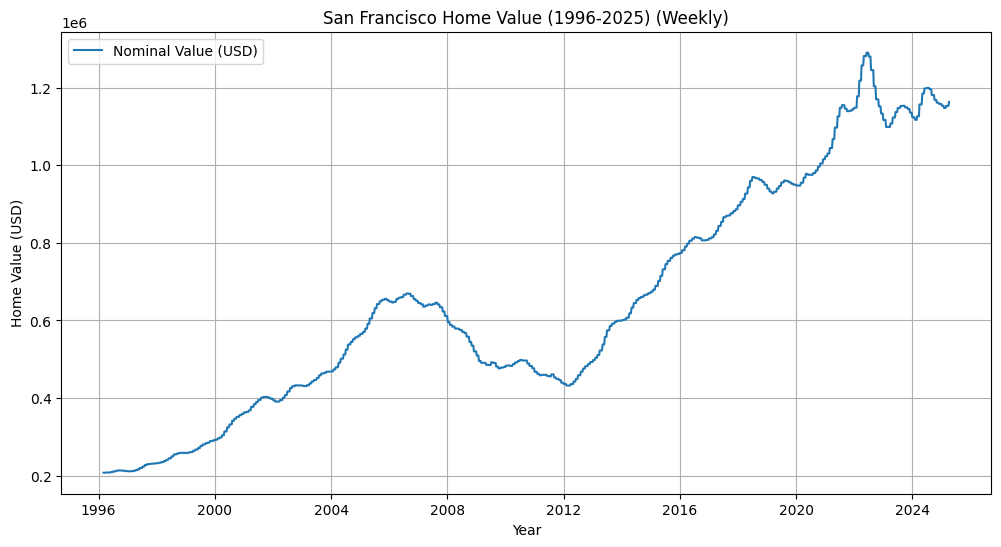

In [328]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(price_data.index, price_data['value'], label='Nominal Value (USD)')

plt.title('San Francisco Home Value (1996-2025) (Weekly)')
plt.xlabel('Year')
plt.ylabel('Home Value (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [329]:
# Normalize prices to CPI base 100
price_data['adjusted_price'] = price_data['value'] / price_data['cpi'] * 100


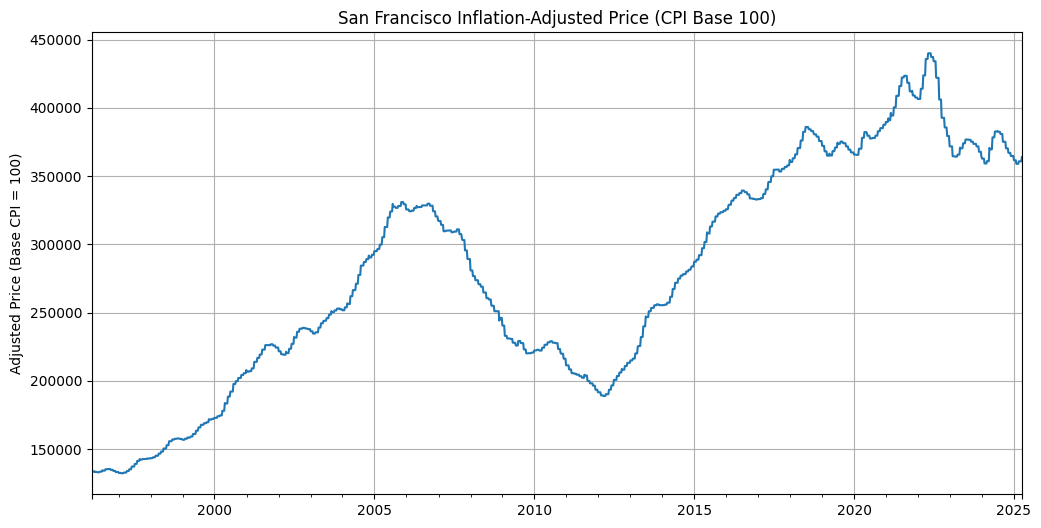

In [330]:
price_data['adjusted_price'].plot(figsize=(12, 6), title="San Francisco Inflation-Adjusted Price (CPI Base 100)", grid=True)
plt.ylabel('Adjusted Price (Base CPI = 100)')
plt.show()


In [331]:
# Shift by 12 months (1 year later)
price_data["next_year"] = price_data["adjusted_price"].shift(-12)

price_data

,value,interest,vacancy,cpi,real_value,adjusted_price,next_year
1996-03-03,2.075599e+05,7.41,7.9,155.500,1334.790305,133479.030513,133034.029332
1996-03-10,2.075599e+05,7.38,7.9,155.500,1334.790305,133479.030513,133518.064507
1996-03-17,2.075599e+05,7.83,7.9,155.500,1334.790305,133479.030513,133518.064507
1996-03-24,2.075599e+05,7.81,7.9,155.500,1334.790305,133479.030513,133518.064507
1996-03-31,2.080434e+05,7.69,7.9,155.500,1337.899384,133789.938393,133518.064507
...,...,...,...,...,...,...,...
2025-03-09,1.153089e+06,6.63,6.9,319.615,3607.744251,360774.425094,NaN
2025-03-16,1.153089e+06,6.65,6.9,319.615,3607.744251,360774.425094,NaN
2025-03-23,1.153089e+06,6.67,6.9,319.615,3607.744251,360774.425094,NaN
2025-03-30,1.153089e+06,6.65,6.9,319.615,3607.744251,360774.425094,NaN


In [332]:
price_data.dropna(inplace=True)
price_data

,value,interest,vacancy,cpi,real_value,adjusted_price,next_year
1996-03-03,2.075599e+05,7.41,7.9,155.500,1334.790305,133479.030513,133034.029332
1996-03-10,2.075599e+05,7.38,7.9,155.500,1334.790305,133479.030513,133518.064507
1996-03-17,2.075599e+05,7.83,7.9,155.500,1334.790305,133479.030513,133518.064507
1996-03-24,2.075599e+05,7.81,7.9,155.500,1334.790305,133479.030513,133518.064507
1996-03-31,2.080434e+05,7.69,7.9,155.500,1337.899384,133789.938393,133518.064507
...,...,...,...,...,...,...,...
2024-12-15,1.158377e+06,6.60,6.9,317.603,3647.246723,364724.672289,360774.425094
2024-12-22,1.158377e+06,6.72,6.9,317.603,3647.246723,364724.672289,360774.425094
2024-12-29,1.158377e+06,6.85,6.9,317.603,3647.246723,364724.672289,360774.425094
2025-01-05,1.153747e+06,6.91,6.9,319.086,3615.788096,361578.809617,360774.425094


In [333]:
price_data["change"] = (price_data["next_year"] > price_data["adjusted_price"]).astype(int)
price_data

,value,interest,vacancy,cpi,real_value,adjusted_price,next_year,change
1996-03-03,2.075599e+05,7.41,7.9,155.500,1334.790305,133479.030513,133034.029332,0
1996-03-10,2.075599e+05,7.38,7.9,155.500,1334.790305,133479.030513,133518.064507,1
1996-03-17,2.075599e+05,7.83,7.9,155.500,1334.790305,133479.030513,133518.064507,1
1996-03-24,2.075599e+05,7.81,7.9,155.500,1334.790305,133479.030513,133518.064507,1
1996-03-31,2.080434e+05,7.69,7.9,155.500,1337.899384,133789.938393,133518.064507,0
...,...,...,...,...,...,...,...,...
2024-12-15,1.158377e+06,6.60,6.9,317.603,3647.246723,364724.672289,360774.425094,0
2024-12-22,1.158377e+06,6.72,6.9,317.603,3647.246723,364724.672289,360774.425094,0
2024-12-29,1.158377e+06,6.85,6.9,317.603,3647.246723,364724.672289,360774.425094,0
2025-01-05,1.153747e+06,6.91,6.9,319.086,3615.788096,361578.809617,360774.425094,0


In [334]:
print(price_data["change"].value_counts())


change
1    956
0    551
Name: count, dtype: int64


In [335]:
# Separate the two classes
ups = price_data[price_data['change'] == 1]
downs = price_data[price_data['change'] == 0]

# Undersample the majority (ups) to match the minority (downs)
balanced_ups = ups.sample(n=len(downs), random_state=42)

# Combine them into a balanced dataset
balanced_price_data = pd.concat([balanced_ups, downs]).sort_index()

# Confirm balance
print(balanced_price_data['change'].value_counts())



change
0    551
1    551
Name: count, dtype: int64


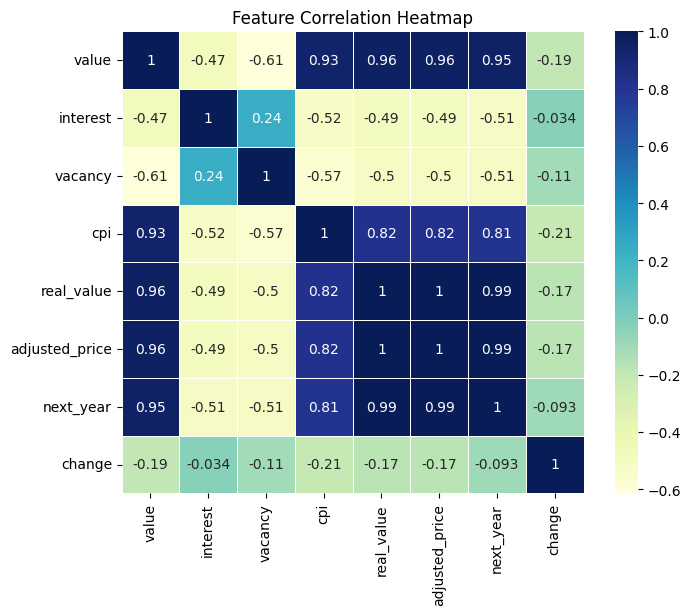

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    price_data.corr(), 
    annot=True, 
    cmap='YlGnBu',  # Try 'YlOrBr', 'BuGn', or others for softer tones
    linewidths=0.5,
    square=True
)
plt.title("Feature Correlation Heatmap")
plt.show()



In [337]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Select features and target
features = ['value', 'interest', 'vacancy', 'cpi', 'adjusted_price']
X = price_data[features]
y = price_data['change']

# Step 2: Shuffle and split into training and test sets (80/20), with class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42
)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data

# Optional: Print dataset shape
print("Train set size after scaling:", X_train_scaled.shape)
print("Test set size after scaling:", X_test_scaled.shape)


Train set size after scaling: (1205, 5)
Test set size after scaling: (302, 5)


In [338]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary classification output
])

# Step 2: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 3: Train the model and store history
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50


c:\Sem_SJSU\cs171\cs171_2008\tf_env_tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4722 - loss: 0.7463 - val_accuracy: 0.6523 - val_loss: 0.6638
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6353 - loss: 0.6565 - val_accuracy: 0.6722 - val_loss: 0.6144
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6814 - loss: 0.6305 - val_accuracy: 0.7020 - val_loss: 0.5864
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7089 - loss: 0.5964 - val_accuracy: 0.7318 - val_loss: 0.5654
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7072 - loss: 0.5896 - val_accuracy: 0.7649 - val_loss: 0.5534
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.5812 - val_accuracy: 0.7715 - val_loss: 0.5411
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 0.5675 - val_accuracy: 0.7947 - val_loss: 0.5334
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7481 - loss: 0.5689 - val_accuracy: 0.7914 - val_loss: 0.5238
Epo

In [339]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)




Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8176 - loss: 0.4659 - val_accuracy: 0.8146 - val_loss: 0.4395
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.4694 - val_accuracy: 0.8146 - val_loss: 0.4392
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 0.4631 - val_accuracy: 0.8212 - val_loss: 0.4400
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8107 - loss: 0.4688 - val_accuracy: 0.8113 - val_loss: 0.4362
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8088 - loss: 0.4676 - val_accuracy: 0.8245 - val_loss: 0.4383
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4940 - val_accuracy: 0.8146 - val_loss: 0.4351
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7882 - loss: 0.4784 - val_accuracy: 0.8212 - val_loss: 0.4363
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7937 - loss: 0.4841 - val_accuracy: 0.8179 - val_loss:

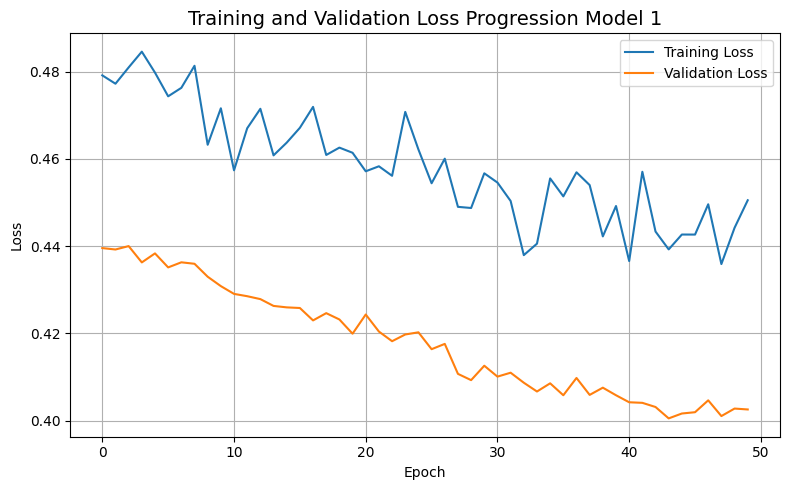

In [340]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss Progression Model 1", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5614 - loss: 0.6736 - val_accuracy: 0.6788 - val_loss: 0.5893
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6695 - loss: 0.6072 - val_accuracy: 0.7318 - val_loss: 0.5620
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7301 - loss: 0.5680 - val_accuracy: 0.7517 - val_loss: 0.5504
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7499 - loss: 0.5551 - val_accuracy: 0.7781 - val_loss: 0.5426
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.5535 - val_accuracy: 0.7781 - val_loss: 0.5375
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7710 - loss: 0.5676 - val_accuracy: 0.7848 - val_loss: 0.5334
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7717 - loss: 0.5541 - val_accuracy: 0.7815 - val_loss: 0.5304
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.5568 - val_accuracy: 0.7947 - 

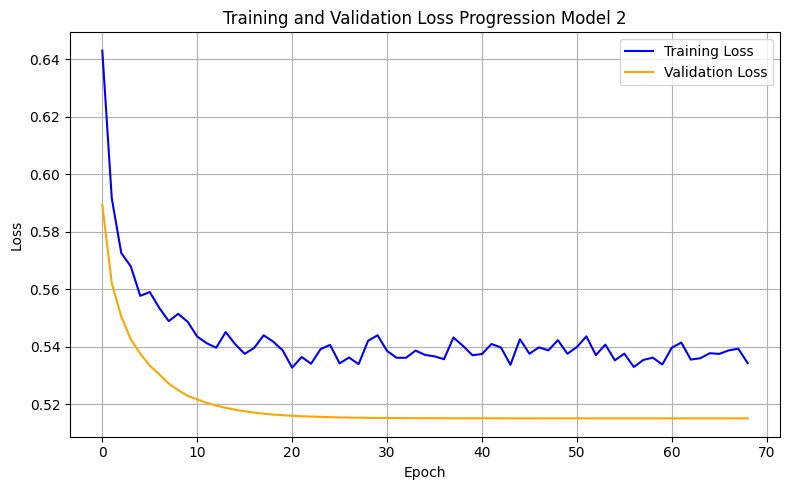

In [341]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt

# Learning rate schedule (optional but improves convergence)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10,
    decay_rate=0.95
)

# Build improved model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model with learning rate schedule
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss Progression Model 2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7041 - loss: 0.6069 - val_accuracy: 0.7450 - val_loss: 0.5275
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - loss: 0.5161 - val_accuracy: 0.8179 - val_loss: 0.4898
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8093 - loss: 0.4970 - val_accuracy: 0.7980 - val_loss: 0.4765
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.5203 - val_accuracy: 0.7748 - val_loss: 0.4762
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7889 - loss: 0.4746 - val_accuracy: 0.7715 - val_loss: 0.4425
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.4888 - val_accuracy: 0.8179 - val_loss: 0.4235
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8005 - loss: 0.4614 - val_accuracy: 0.8046 - val_loss: 0.4559
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7918 - loss: 0.4528 - val_accuracy: 0.8344 - v

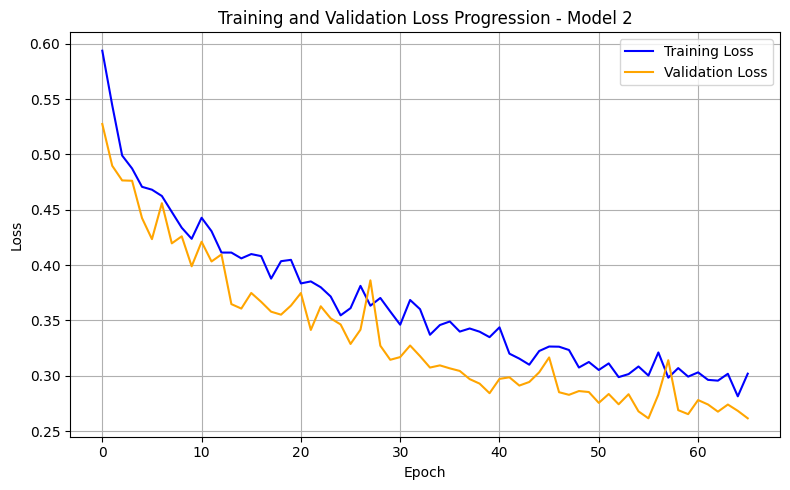

In [342]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.05),
    Dense(32, activation='relu'),
    Dropout(0.05),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss Progression - Model 2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KNN Accuracy: 0.9503311258278145

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.95      0.97      0.96       192

    accuracy                           0.95       302
   macro avg       0.95      0.94      0.95       302
weighted avg       0.95      0.95      0.95       302


Confusion Matrix:
 [[101   9]
 [  6 186]]


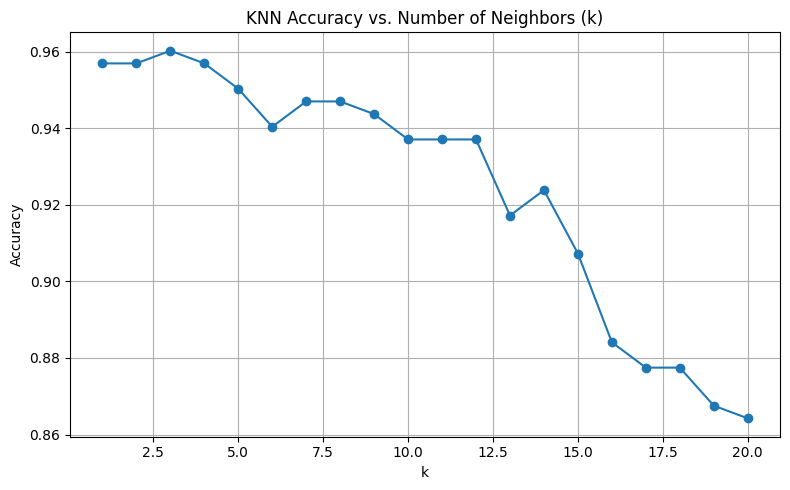

In [343]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train
knn.fit(X_train_scaled, y_train)

# Step 3: Predict
y_pred_knn = knn.predict(X_test_scaled)

# Step 4: Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs. Number of Neighbors (k)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()



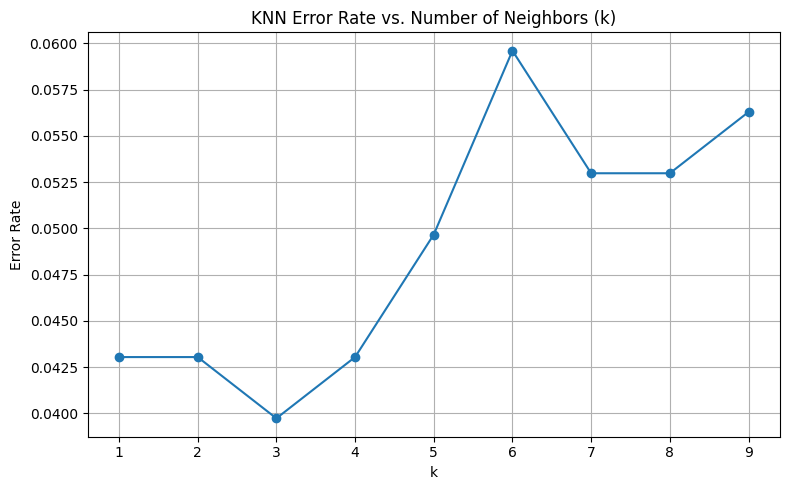

In [344]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rates = []
k_range = range(1, 10)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_range, error_rates, marker='o', linestyle='-')
plt.title("KNN Error Rate vs. Number of Neighbors (k)")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [345]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 1. Select features and target
features = ['value', 'interest', 'vacancy', 'cpi', 'adjusted_price']
X = price_data[features]
y = price_data['change']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n=== K-Nearest Neighbors (KNN) ===")
print(classification_report(y_test, y_pred_knn))




=== K-Nearest Neighbors (KNN) ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       107
           1       0.95      0.95      0.95       195

    accuracy                           0.94       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.94      0.94      0.94       302



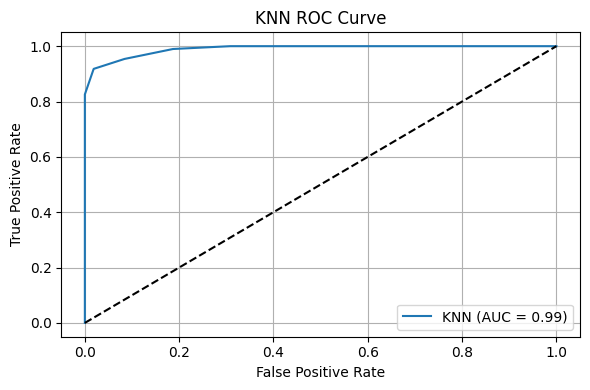

In [346]:
from sklearn.metrics import roc_curve, auc

y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


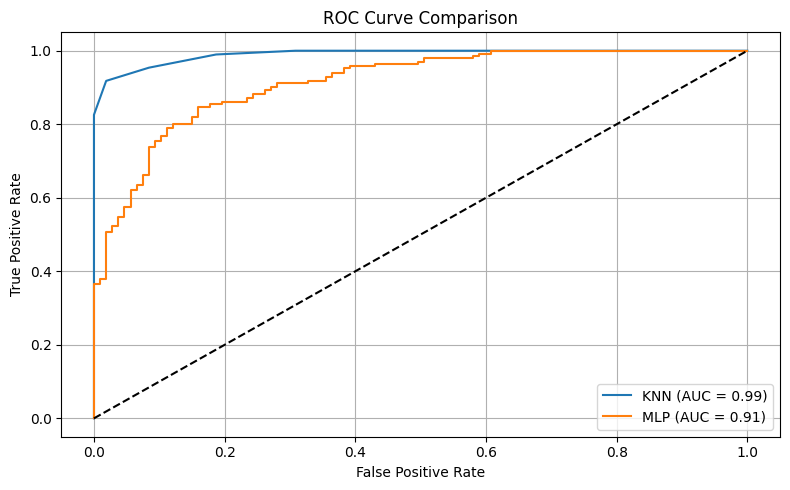

In [347]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

auc_knn = auc(fpr_knn, tpr_knn)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
